<a href="https://colab.research.google.com/github/Tejaswi-kashyap-006/GAN_network/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


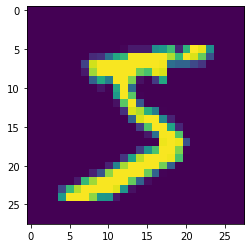

In [ ]:
plt.imshow(X_train[0])

In [ ]:
only_zeros = X_train[y_train==0]

In [ ]:
only_zeros.shape

(5923, 28, 28)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100, activation = 'relu'))
# final output layer 
discriminator.add(Dense(1, activation = 'sigmoid'))

discriminator.compile(loss ='binary_crossentropy', optimizer='adam')

In [ ]:
codings_size=100

generator = Sequential()
generator.add(Dense(100,activation = 'relu', input_shape=[codings_size]))
generator.add(Dense(150,activation= 'relu'))
generator.add(Dense(784,activation= 'relu'))
generator.add(Reshape([28,28]))

In [ ]:
GAN = Sequential([generator, discriminator])

In [ ]:
discriminator.trainable = False

In [ ]:
GAN.compile(loss = 'binary_crossentropy', optimizer='adam')

In [ ]:
batch_size = 32

In [ ]:
my_data = only_zeros

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [ ]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [ ]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
epochs = 100

In [ ]:
generator, discriminator = GAN.layers 

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0

    for X_batch in dataset:

        i = i+1

        if i%100 == 0:
            print(f"\t currently on batch number {i} of {len(my_data)//batch_size} ")

        #Discrimnator
        noise = tf.random.normal(shape=[batch_size, codings_size])
        gen_images = generator(noise) 
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real,y1)

        #train the generator
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)



Currently on Epoch 1
	 currently on batch number 100 of 185 
Currently on Epoch 2
	 currently on batch number 100 of 185 
Currently on Epoch 3
	 currently on batch number 100 of 185 
Currently on Epoch 4
	 currently on batch number 100 of 185 
Currently on Epoch 5
	 currently on batch number 100 of 185 
Currently on Epoch 6
	 currently on batch number 100 of 185 
Currently on Epoch 7
	 currently on batch number 100 of 185 
Currently on Epoch 8
	 currently on batch number 100 of 185 
Currently on Epoch 9
	 currently on batch number 100 of 185 
Currently on Epoch 10
	 currently on batch number 100 of 185 
Currently on Epoch 11
	 currently on batch number 100 of 185 
Currently on Epoch 12
	 currently on batch number 100 of 185 
Currently on Epoch 13
	 currently on batch number 100 of 185 
Currently on Epoch 14
	 currently on batch number 100 of 185 
Currently on Epoch 15
	 currently on batch number 100 of 185 
Currently on Epoch 16
	 currently on batch number 100 of 185 
Currently on Epoc

In [ ]:
noise = tf.random.normal(shape=[10,codings_size])

In [ ]:
noise.shape

TensorShape([10, 100])

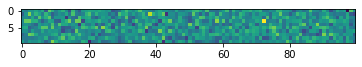

In [ ]:
plt.imshow(noise)

In [ ]:
images = generator(noise)

In [ ]:
images.shape

TensorShape([10, 28, 28])

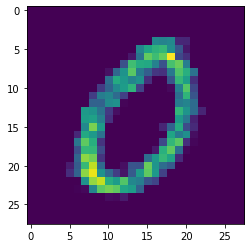

In [ ]:
plt.imshow(images[0])

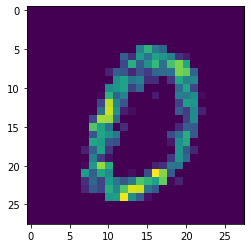

In [ ]:
plt.imshow(images[1])

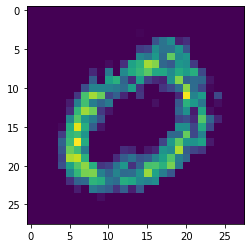

In [ ]:
plt.imshow(images[2])